In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import planet_sampler_pop as ps
%load_ext autoreload
%autoreload 2
import scipy.interpolate as irp
import math
import scipy.integrate as si

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
test = ps.PlanetSample('test_photons.txt', dataset= "SAG")
test.append_fluxes('test_photons_LIFE.txt')

In [62]:
r_mask_down = test.Rp > 0.5
r_mask_up = test.Rp < 1.65
iwa_mask = test.ang_sep > 5E-3
owa_mask = test.ang_sep < 1
max_flux_mask = test.F_inc <= 1.75 # Fixed HZ
min_flux_mask = test.F_inc >= 0.37
hab_mask =  r_mask_down & r_mask_up & iwa_mask & owa_mask & max_flux_mask & min_flux_mask 
"""plt.figure(figsize = (14,12))
plt.xlabel("Photon count $[h^{-1} m^{-2}]$", fontsize = 18)
plt.ylabel("Number of planets", fontsize = 18)
plt.hist(test.photons_1000W[hab_mask], bins = 100)
plt.show()"""

'plt.figure(figsize = (14,12))\nplt.xlabel("Photon count $[h^{-1} m^{-2}]$", fontsize = 18)\nplt.ylabel("Number of planets", fontsize = 18)\nplt.hist(test.photons_1000W[hab_mask], bins = 100)\nplt.show()'

In [75]:
photons_habitable = test.photons_1000W[hab_mask] * 3600 * 24 * math.pi*3.5*3.5 #photons for 3.5m telescope for 24 hour

In [76]:
SNR =np.sqrt(photons_habitable) # compute SNR

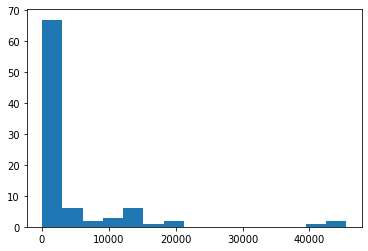

In [56]:
plt.hist(photons_habitable, bins = 15)
plt.show()

In [77]:
test.a[457]

0.17923

In [78]:
np.count_nonzero(SNR > 10)

86

In [79]:
np.count_nonzero(hab_mask)

90

In [74]:
len(test.nMC)

963

In [83]:
np.median(test.a[hab_mask])

0.113215